# Content

1. Loading Packages
2. Loading the Data
3. Understanding the Data
4. Univariate Analysis
5. Bivariate Analysis
6. Missing Value and Outlier Treatment
7. Model Building
   - Choosing Evaluation Criterion
   - Feature Engineering
   - Model Selection
8. Final Results

### 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\carbon x1\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Loading the Data

In [2]:
train_data  = pd.read_csv('train_data.csv')
test_data  = pd.read_csv('test_data.csv')

# making copy of data

train = train_data.copy()
test = test_data.copy()

### 3. Understanding the Data

In [3]:
# Features
print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [4]:
# Data Shapes
print('Train: ', train.shape)
print('Test: ', test.shape)

Train:  (614, 13)
Test:  (367, 13)


In [5]:
# Data Types
print(train.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


### 4. Univariate Analysis

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

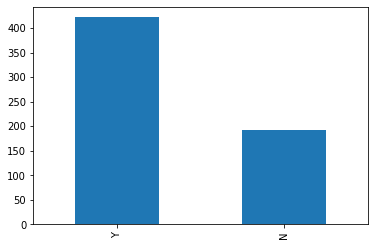

In [6]:
# Lets check the the loan_status first
train['Loan_Status'].value_counts().plot.bar()
train['Loan_Status'].value_counts(normalize=True)

#### Lets analyse other features by category:
    -1. categorical features [Gender, Married,Self_Employed, Credit_History,Loan_Status]
    -2. ordinal features [Dependents, Education, Property_Area]
    -3. numerical features [ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term]

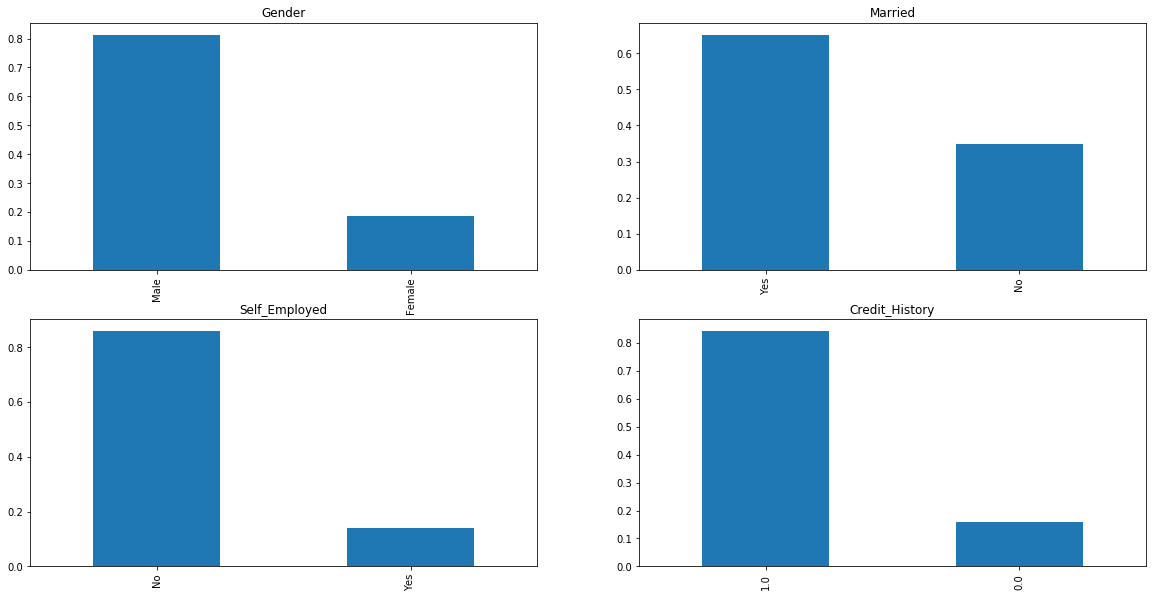

In [7]:
#1. Checking categorical features 
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Credit_History')
plt.show()

#### Summary 1:
- 80 % of applicants are male,
- 65 % of applicants are married,
- 15% of applicants are self_employed,
- 10% of applicants repaid their depths.

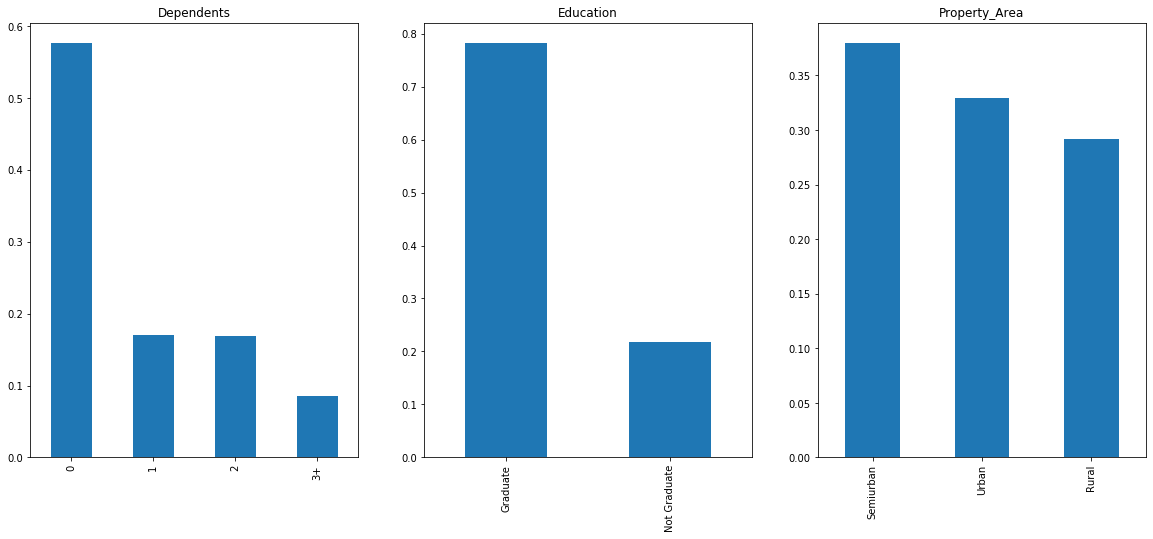

In [8]:
#2. Checking ordinal features 
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,8),title = 'Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(20,8),title = 'Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,8),title = 'Property_Area')
plt.show()

#### Summary 2:
- most of applicants dont have dependents,
- 75 % of applicants are graduate,
- more applicats are from Semiurban area

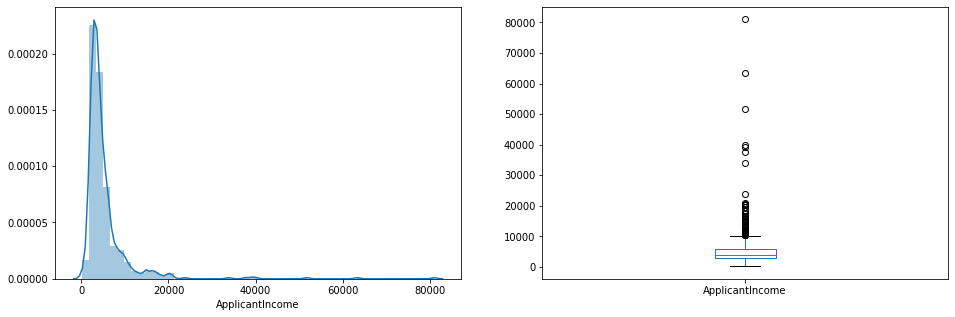

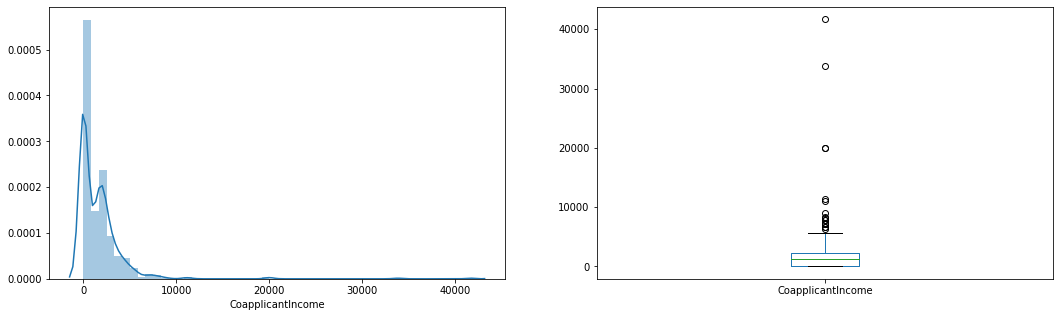

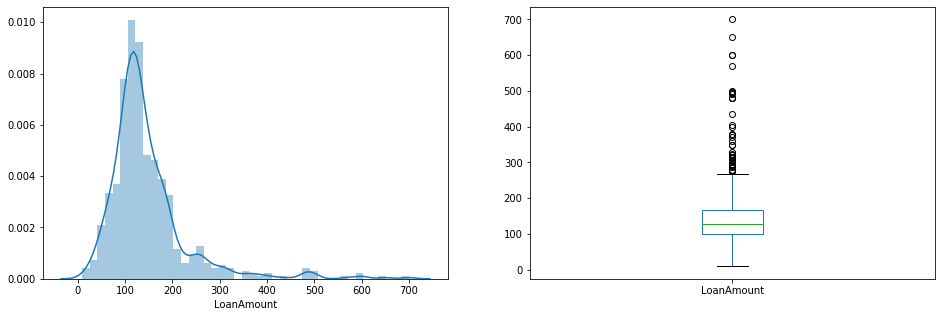

In [9]:
#3. Checking numerical features 
plt.figure(1,figsize=(16,5))
plt.subplot(121)
sns.distplot(train['ApplicantIncome'].dropna())
plt.subplot(122)
train['ApplicantIncome'].plot.box()
plt.show()

plt.figure(2,figsize=(18,5))
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'].dropna())
plt.subplot(122)
train['CoapplicantIncome'].plot.box()
plt.show()

plt.figure(3,figsize=(16,5))
plt.subplot(121)
sns.distplot(train['LoanAmount'].dropna())
plt.subplot(122)
train['LoanAmount'].plot.box()
plt.show()

#### Summary 3:
  - there are outliers in all numerical features,
  - the distribution of applicant_income and coapplicant_income feaures are not normal,
  - the distribution of loan_amount is fairly normal.

### 5. Bivariate Analysis

Lets put our expectations before the analysis, what we expect:
- Applicants with high income should have more chances for loan approval
- Applicants who have repaid their previous debts should have higher chances
- Loan approval should depend on loan amount 
- Lesser the amount to be paid monthly to repay the loan, higher the chances of getting approval

5.1. Categorical variables vs target variable

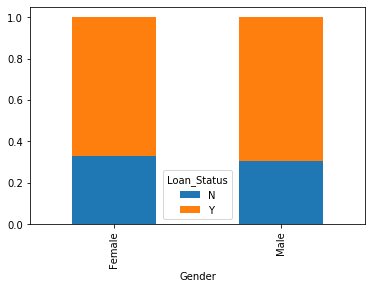

In [10]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

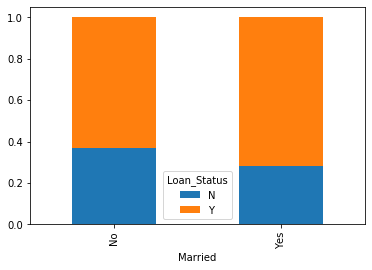

In [11]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

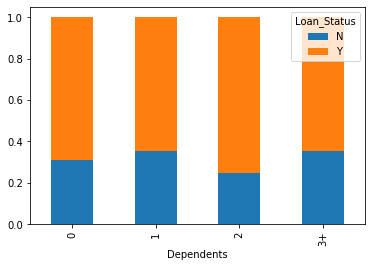

In [12]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

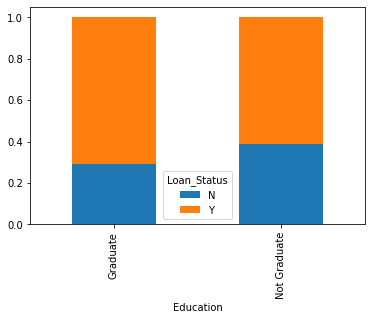

In [13]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

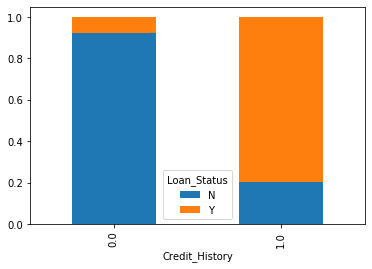

In [14]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

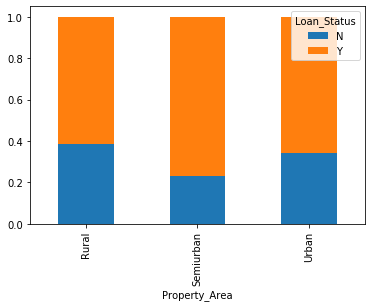

In [15]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

5.1 Summary:
- all our expectations are satisfied
- gender and propery area has no big impact

5.2. Numerical variables vs target variable

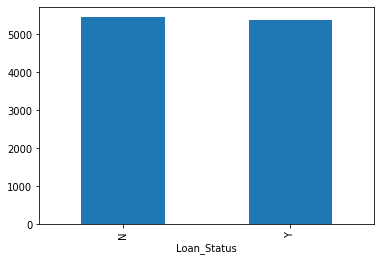

In [16]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

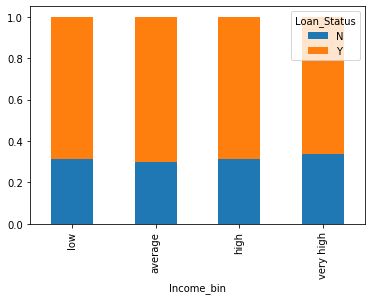

In [17]:
bins = [0,2500,4000,6000,81000]
group = ['low','average','high','very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels =group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

Seem that applicants income doesnt have impact on loan status, which is not what we expected.

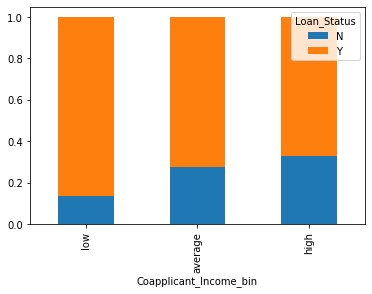

In [18]:
bins = [0,1000,3000,42000]
group = ['low','average','high']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels =group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

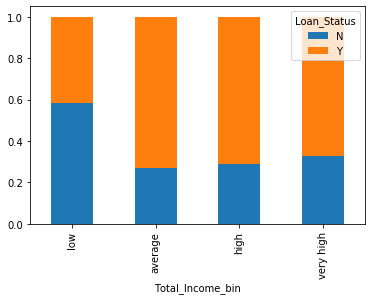

In [19]:
bins = [0,2500,4000,6000,81000]
group = ['low','average','high','very high']
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels = group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot.bar(stacked=True)

5.3 Now lets check the correlation between our features

In [20]:
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']
train = train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income_bin'],axis=1)

In [21]:
train['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

test['Dependents'].replace('3+',3,inplace=True)
test['Loan_Status'].replace('N',0,inplace=True)
test['Loan_Status'].replace('Y',1,inplace=True)

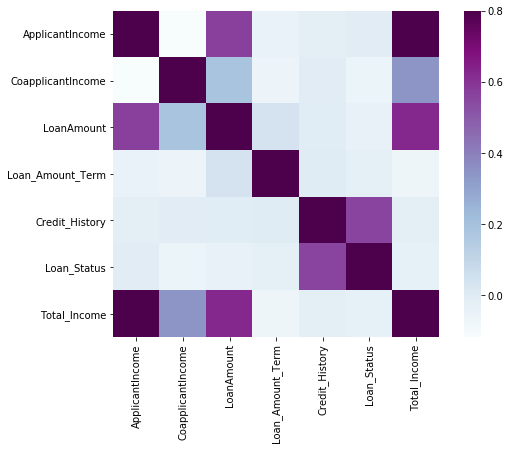

In [22]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap = 'BuPu')

This is a good summary of bivariate analysis.

### 6. Missing Value and Outlier Treatment

6.1 Missing Value Imputation

In [23]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

The following methods I will use:
   - for numerical variables: imputaiton using mean or median
   - for categorical variables: imputation using mode

In [24]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [25]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [26]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [27]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

6.2 Outlier Treatment

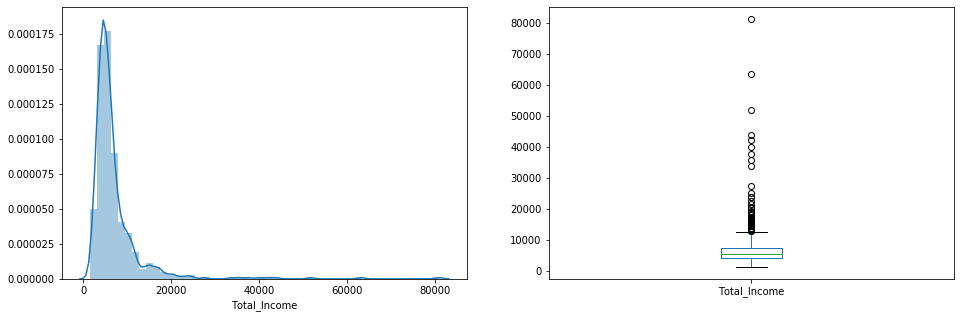

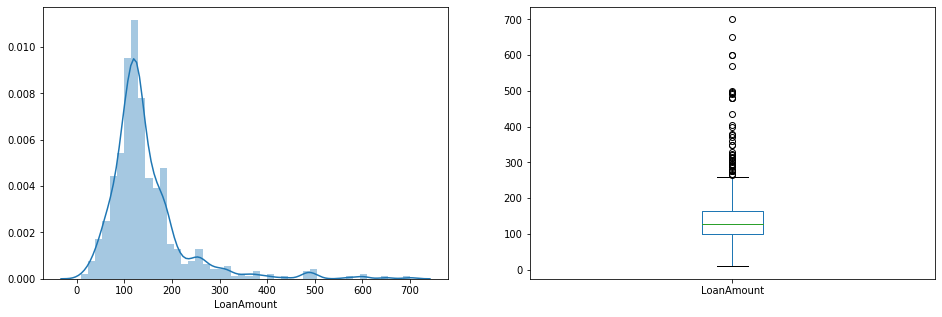

In [28]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
sns.distplot(train['Total_Income'].dropna())
plt.subplot(122)
train['Total_Income'].plot.box()
plt.show()

plt.figure(1,figsize=(16,5))
plt.subplot(121)
sns.distplot(train['LoanAmount'].dropna())
plt.subplot(122)
train['LoanAmount'].plot.box()
plt.show()

Lets make log transformation to reduce effect of outliers

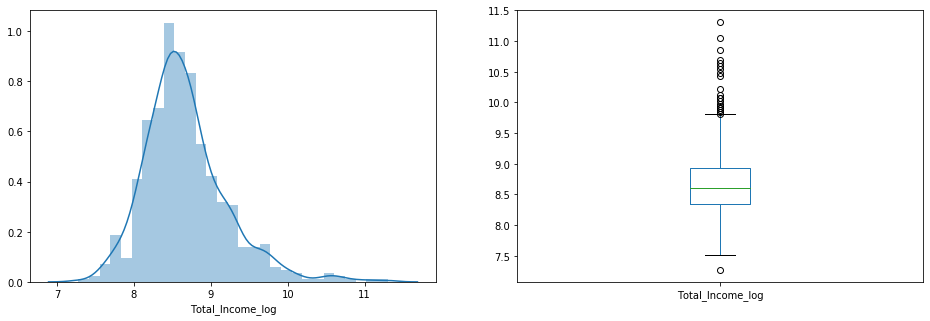

In [29]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
train['Total_Income_log'] = np.log(train['Total_Income']) 
sns.distplot(train['Total_Income_log'])
plt.subplot(122)
train['Total_Income_log'].plot.box()
plt.show()

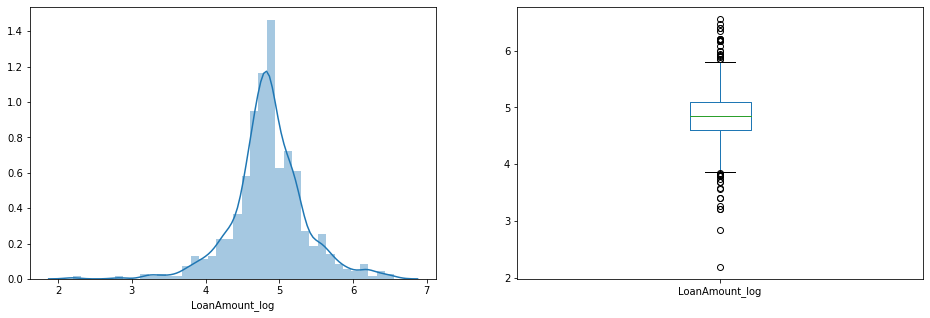

In [30]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
sns.distplot(train['LoanAmount_log'])
plt.subplot(122)
train['LoanAmount_log'].plot.box()
plt.show()

Now, the distributions are far better as we can see.

In [31]:
test['Total_Income_log'] = np.log(test['Total_Income']) 
test['LoanAmount_log'] = np.log(test['LoanAmount']) 


### 7. Model Building
  

Choosing Evaluation Criterion: We will use ROC curve to estimate models accuracy
   

Feature Engineering: Will just try features as they are

I will test the following models:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

In [32]:
# Preparing dataset for feeding into the models

In [33]:
y = train.Loan_Status
y_test = test.Loan_Status

X = train.drop(['Loan_Status','Loan_ID','Total_Income','LoanAmount','ApplicantIncome','CoapplicantIncome'],1)
test  = test.drop(['Loan_Status','Loan_ID','Total_Income','LoanAmount','ApplicantIncome','CoapplicantIncome'],1)

X = pd.get_dummies(X)
test = pd.get_dummies(test)


In [34]:
#print(test.columns)
# Lets remove correlated features
X = X.drop(['Self_Employed_No','Education_Graduate','Gender_Female','Married_No'],1)
test = test.drop(['Self_Employed_No','Education_Graduate','Gender_Female','Married_No'],1)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [36]:
# Logostic Regression
lr_scores = []
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = roc_auc_score(yvl,pred_test)
    lr_scores.append(score)
    print('kfold {} =>'.format(i),'Accuracy:',round(score,3))
    i+=1
print('\n Mean Score:', round(np.mean(lr_scores),3))

kfold 1 => Accuracy: 0.688
kfold 2 => Accuracy: 0.7
kfold 3 => Accuracy: 0.716
kfold 4 => Accuracy: 0.737
kfold 5 => Accuracy: 0.658
kfold 6 => Accuracy: 0.725
kfold 7 => Accuracy: 0.725
kfold 8 => Accuracy: 0.632
kfold 9 => Accuracy: 0.737
kfold 10 => Accuracy: 0.737

 Mean Score: 0.705


In [37]:
# 2. Decision Tree
dt_scores = []
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = roc_auc_score(yvl,pred_test)
    dt_scores.append(score)
    print('kfold {} =>'.format(i),'Accuracy:',round(score,3))
    i+=1
print('\n Mean Score:', round(np.mean(dt_scores),3))

kfold 1 => Accuracy: 0.695
kfold 2 => Accuracy: 0.667
kfold 3 => Accuracy: 0.67
kfold 4 => Accuracy: 0.635
kfold 5 => Accuracy: 0.577
kfold 6 => Accuracy: 0.644
kfold 7 => Accuracy: 0.587
kfold 8 => Accuracy: 0.585
kfold 9 => Accuracy: 0.754
kfold 10 => Accuracy: 0.603

 Mean Score: 0.642


In [38]:
# 3. Random Forest Tree
rf_scores = []
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = roc_auc_score(yvl,pred_test)
    rf_scores.append(score)
    print('kfold {} =>'.format(i),'Accuracy:',round(score,3))
    i+=1
print('\n Mean Score:', round(np.mean(rf_scores),3))

kfold 1 => Accuracy: 0.653
kfold 2 => Accuracy: 0.702
kfold 3 => Accuracy: 0.742
kfold 4 => Accuracy: 0.716
kfold 5 => Accuracy: 0.66
kfold 6 => Accuracy: 0.699
kfold 7 => Accuracy: 0.713
kfold 8 => Accuracy: 0.658
kfold 9 => Accuracy: 0.763
kfold 10 => Accuracy: 0.751

 Mean Score: 0.706


In [39]:
# 4. XGBoost 
xgb_scores = []
i=1
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = XGBClassifier(n_estimators=50,max_depth=5,eval_metric='mlogloss')
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = roc_auc_score(yvl,pred_test)
    xgb_scores.append(score)
    print('kfold {} =>'.format(i),'Accuracy:',round(score,3))
    i+=1
print('\n Mean Score:', round(np.mean(xgb_scores),3))

kfold 1 => Accuracy: 0.667
kfold 2 => Accuracy: 0.69
kfold 3 => Accuracy: 0.73
kfold 4 => Accuracy: 0.754
kfold 5 => Accuracy: 0.675
kfold 6 => Accuracy: 0.742
kfold 7 => Accuracy: 0.665
kfold 8 => Accuracy: 0.61
kfold 9 => Accuracy: 0.751
kfold 10 => Accuracy: 0.756

 Mean Score: 0.704


In [40]:
all_scores = [['lr',np.mean(lr_scores)],['rf',np.mean(rf_scores)],['dt',np.mean(dt_scores)],['xgb',np.mean(xgb_scores)]]
all_scores

[['lr', 0.7053785626857841],
 ['rf', 0.7056986944104447],
 ['dt', 0.6417347146937111],
 ['xgb', 0.7040560704085796]]

In [41]:
# As we can see,the best model is Random Forest

In [42]:
# Lets check also feature importances

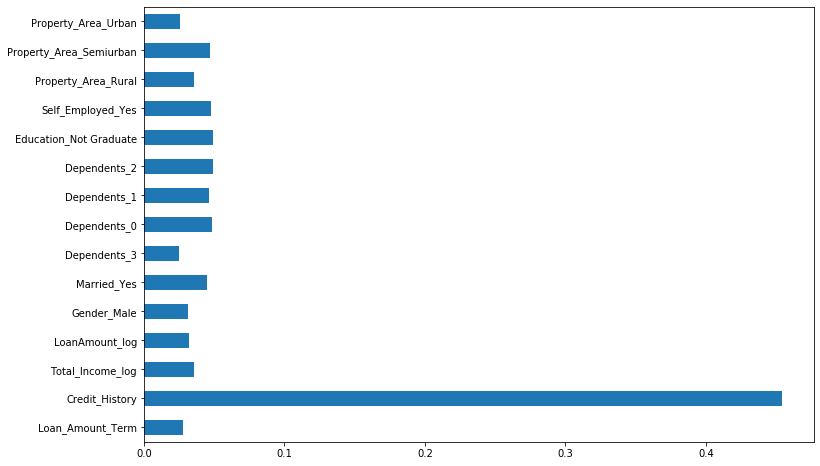

In [43]:
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))

In [44]:
# Now, lets do Grid search for RF model, to increase the accuracy

In [45]:
paramgrid = {'max_depth':list(range(1,21,2)), 'n_estimators': list(range(1,201,50))}

In [46]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=10),paramgrid)
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.3,random_state=1)
grid_search.fit(x_train,y_train)

C:\Users\carbon x1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [47]:
# getting best model parameters
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
# Testing best RF model
f_rf_scores = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=10, shuffle=True)
for train_index,test_index in kf.split(X,y):
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    f_rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)
    f_rf_model.fit(xtr,ytr)
    pred_test = f_rf_model.predict(xvl)
    score = roc_auc_score(yvl,pred_test)
    f_rf_scores.append(score)
    print('kfold {} =>'.format(i),'Accuracy:',round(score,3))
    i+=1

print('\n Mean Score:', round(np.mean(f_rf_scores),3))

### 8. Final Results

In [54]:
predict_test = f_rf_model.predict(test)
#roc_auc_score(y_test,pred_test)

In [55]:
predict_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,